In [5]:
!pip install -U ultralytics

  Using cached ultralytics-8.2.53-py3-none-any.whl.metadata (41 kB)
Using cached ultralytics-8.2.53-py3-none-any.whl (800 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.196
    Uninstalling ultralytics-8.0.196:
      Successfully uninstalled ultralytics-8.0.196


In [1]:
import ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

display.clear_output()
ultralytics.checks()


Ultralytics YOLOv8.2.53 🚀 Python-3.8.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7973MiB)
Setup complete ✅ (12 CPUs, 15.5 GB RAM, 733.2/915.8 GB disk)


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/balarcon/Palma/prueba2


In [3]:
!mkdir {HOME}/dataset
%cd {HOME}/dataset

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nzp8Hw8wNQsf5de7gAwA")
project = rf.workspace("innovatech").project("motorcycle-helmet-q0wmd")
version = project.version(1)
dataset = version.download("yolov8")


mkdir: no se puede crear el directorio «/home/balarcon/Palma/prueba2/dataset»: El archivo ya existe
/home/balarcon/Palma/prueba2/dataset
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.53, to fix: `pip install ultralytics==8.0.196`


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 plots=True

/home/balarcon/Palma/prueba2
100%|██████████████████████████████████████| 49.7M/49.7M [00:14<00:00, 3.57MB/s]
Ultralytics YOLOv8.2.53 🚀 Python-3.8.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7973MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cl

In [5]:
import subprocess
result = subprocess.run(['nvidia-smi'], stdout=subprocess.PIPE)
print(result.stdout.decode('utf-8'))

Thu Jul 11 00:21:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080         On | 00000000:03:00.0 Off |                  N/A |
| 29%   48C    P8                2W / 215W|      3MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

TRAIN -> yolov8s

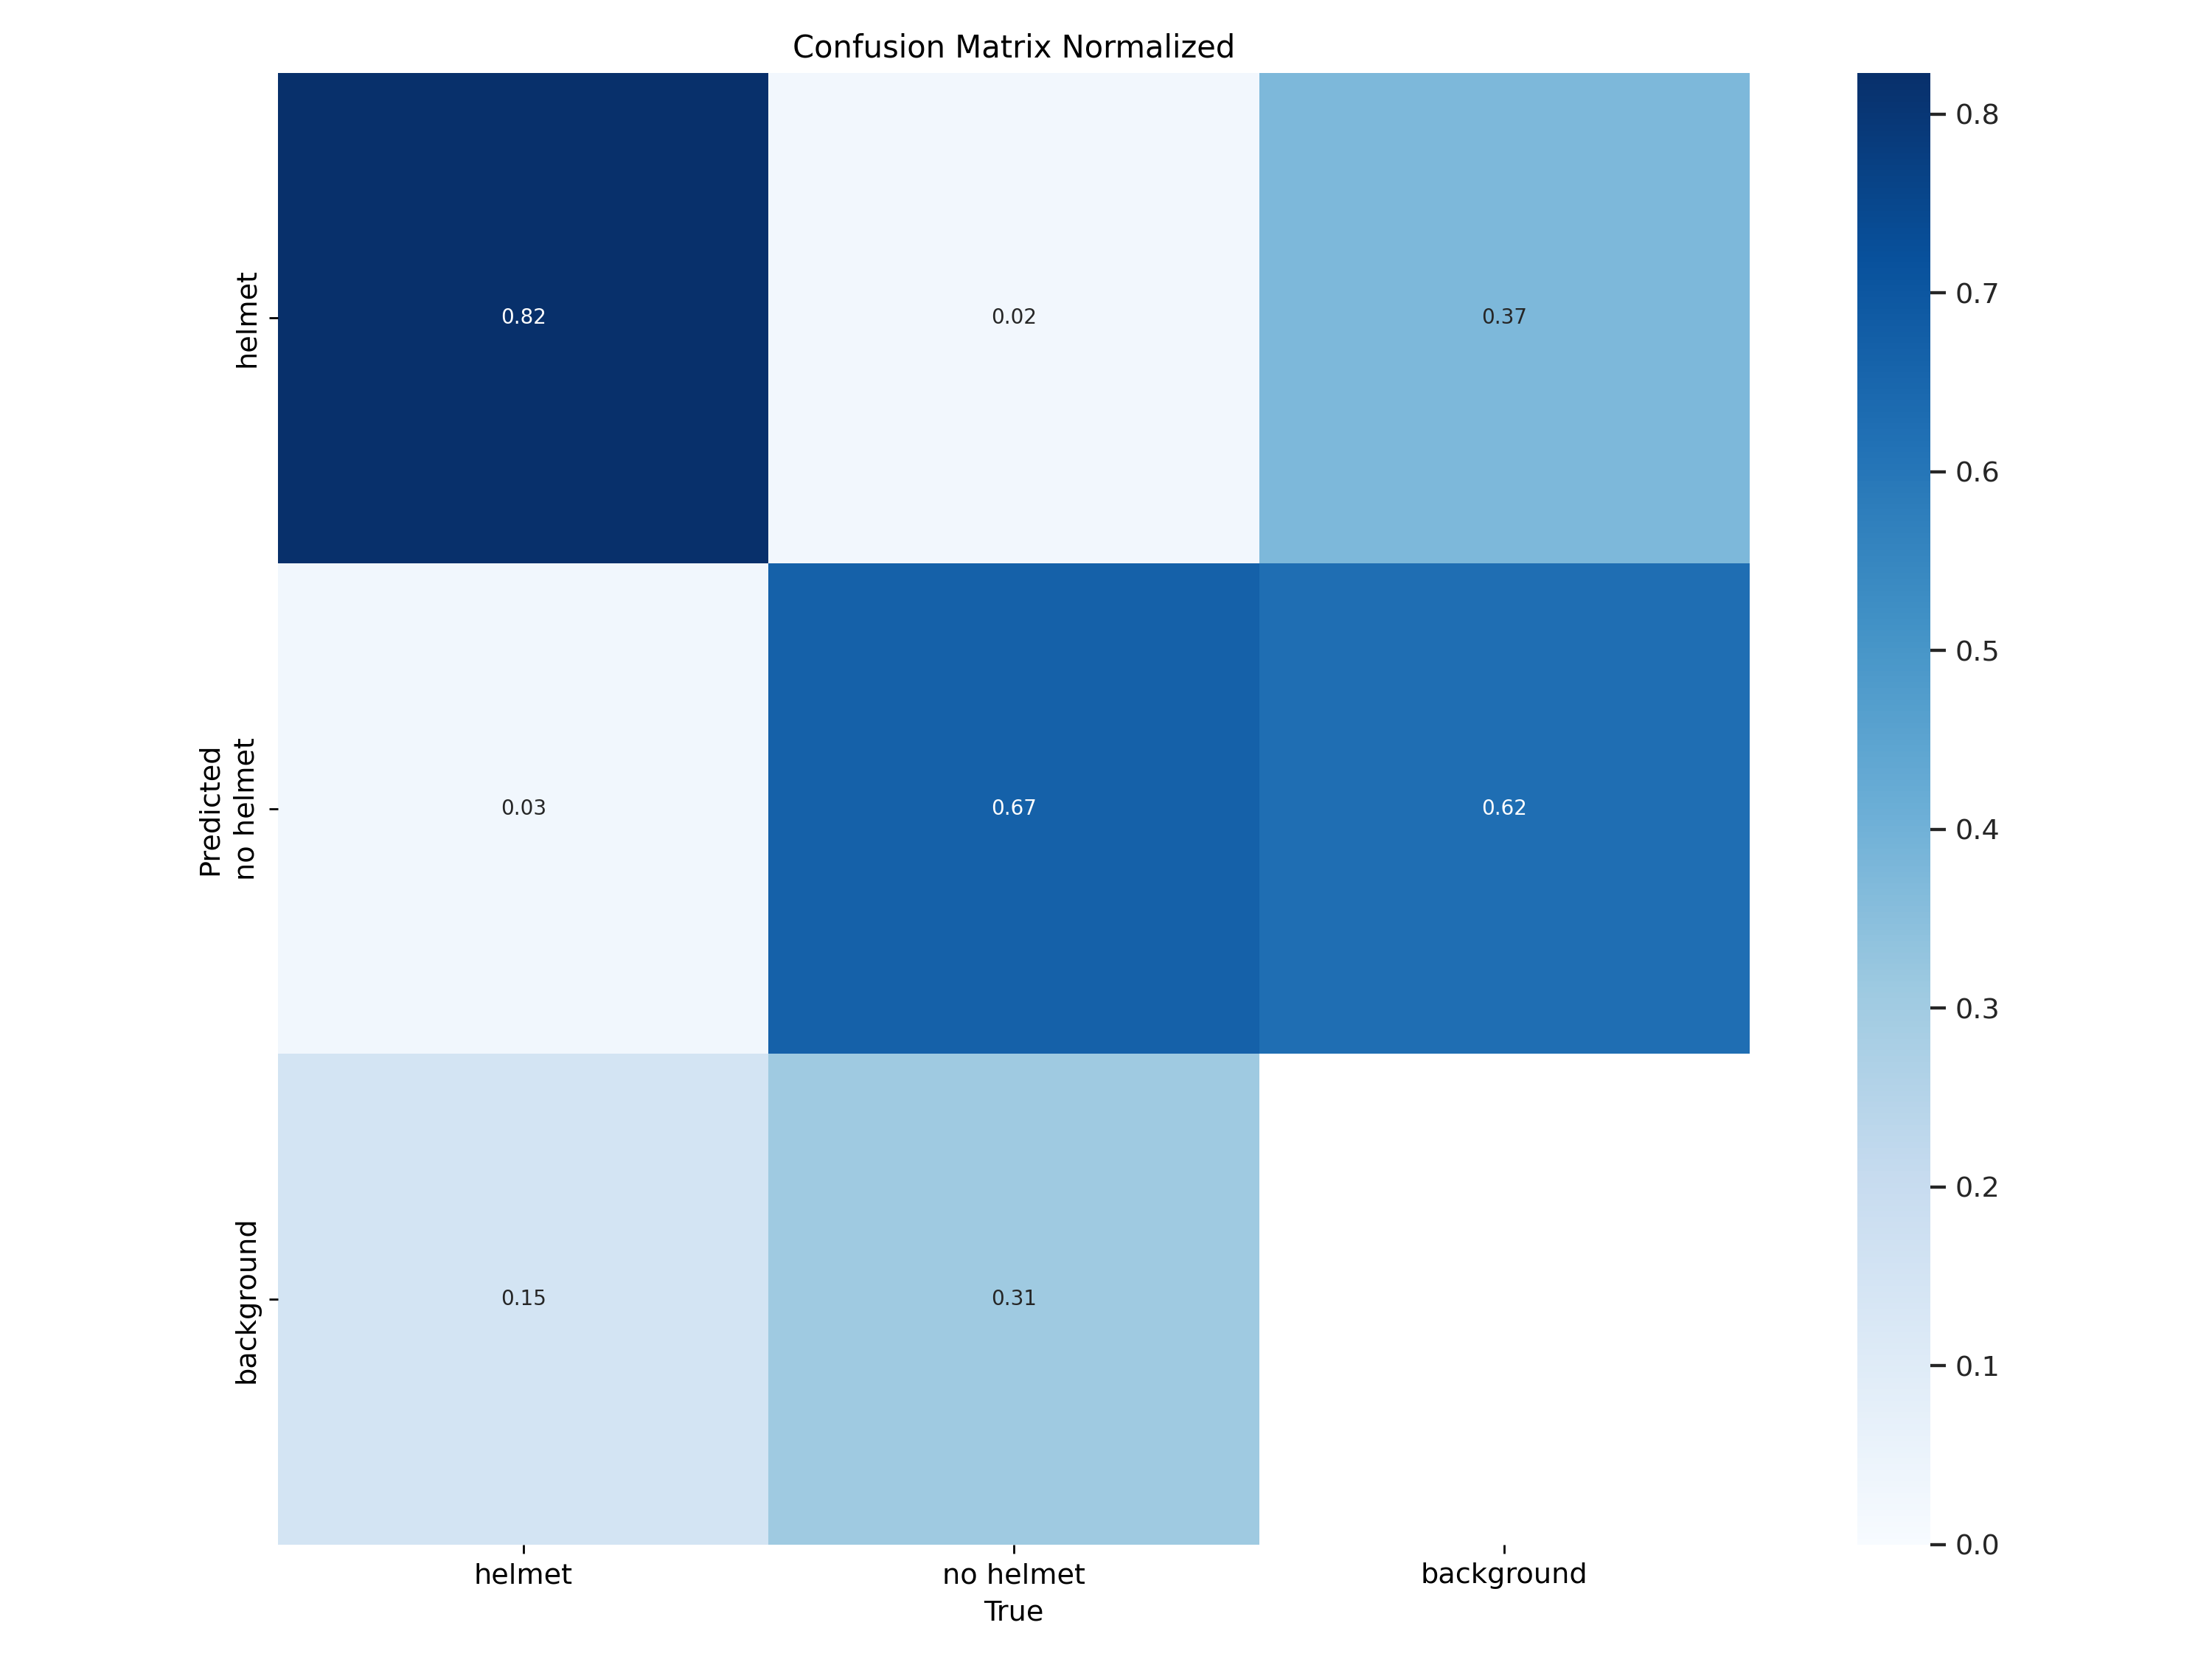

In [8]:
Image(filename=f'/home/balarcon/Palma/prueba2/runs/detect/train2/confusion_matrix_normalized.png', width=800)

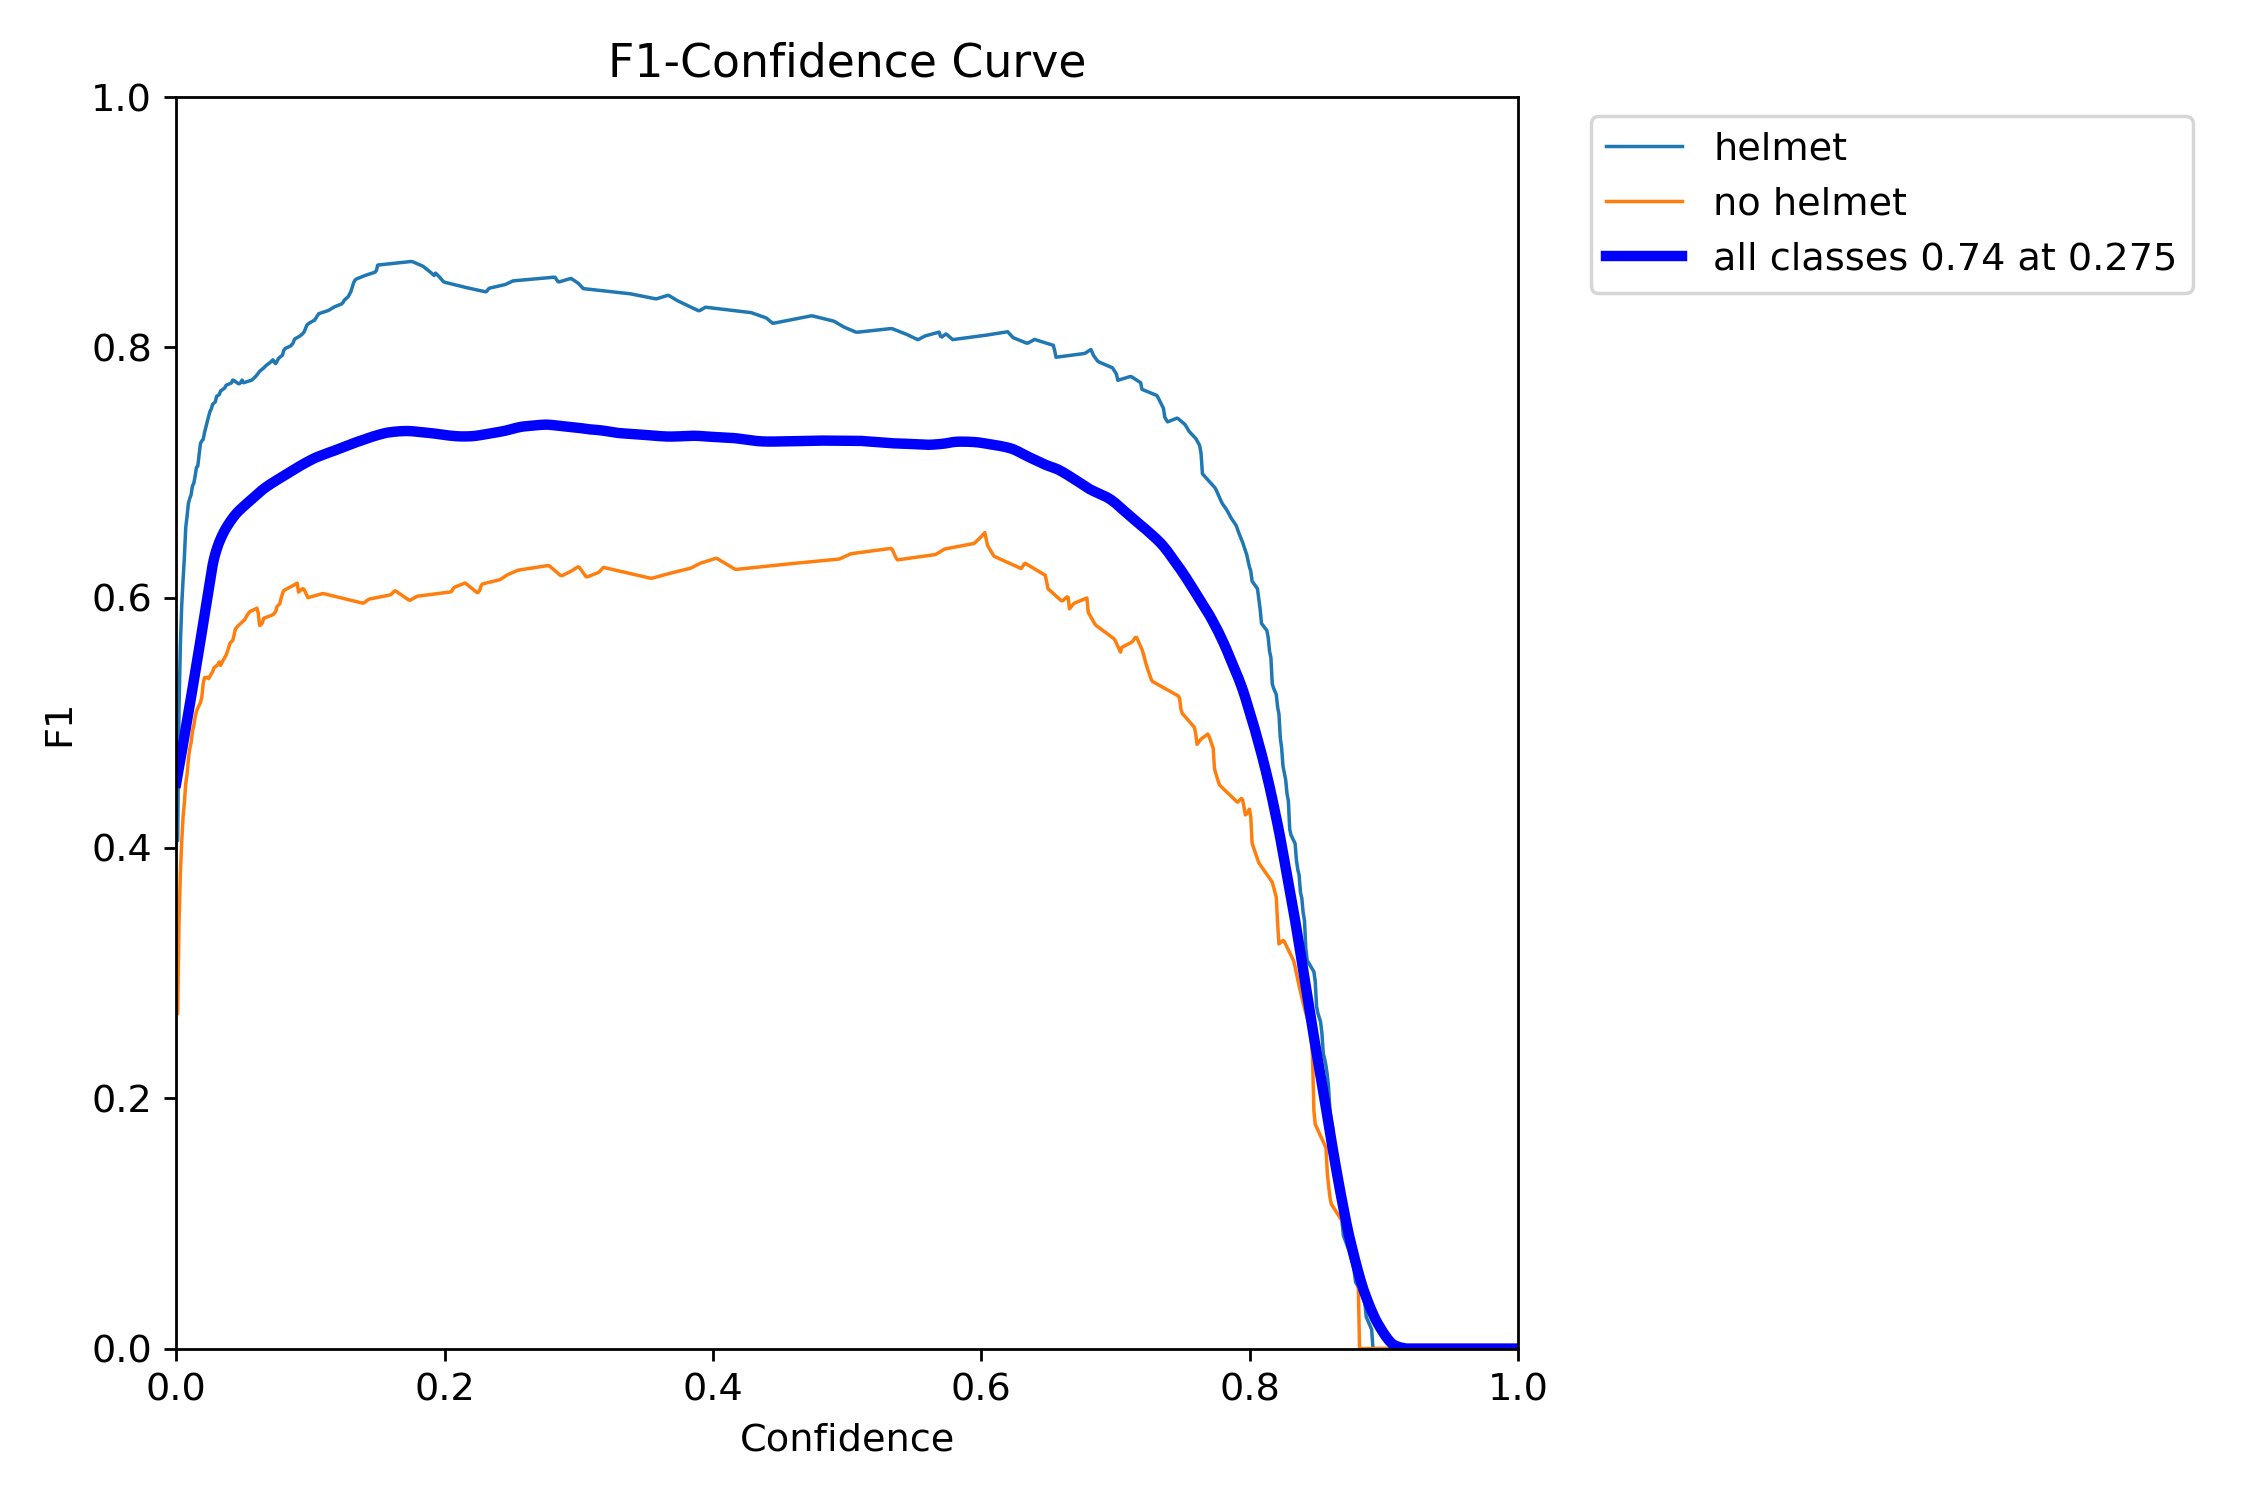

In [9]:
Image(filename=f'/home/balarcon/Palma/prueba2/runs/detect/train2/F1_curve.png', width=800)

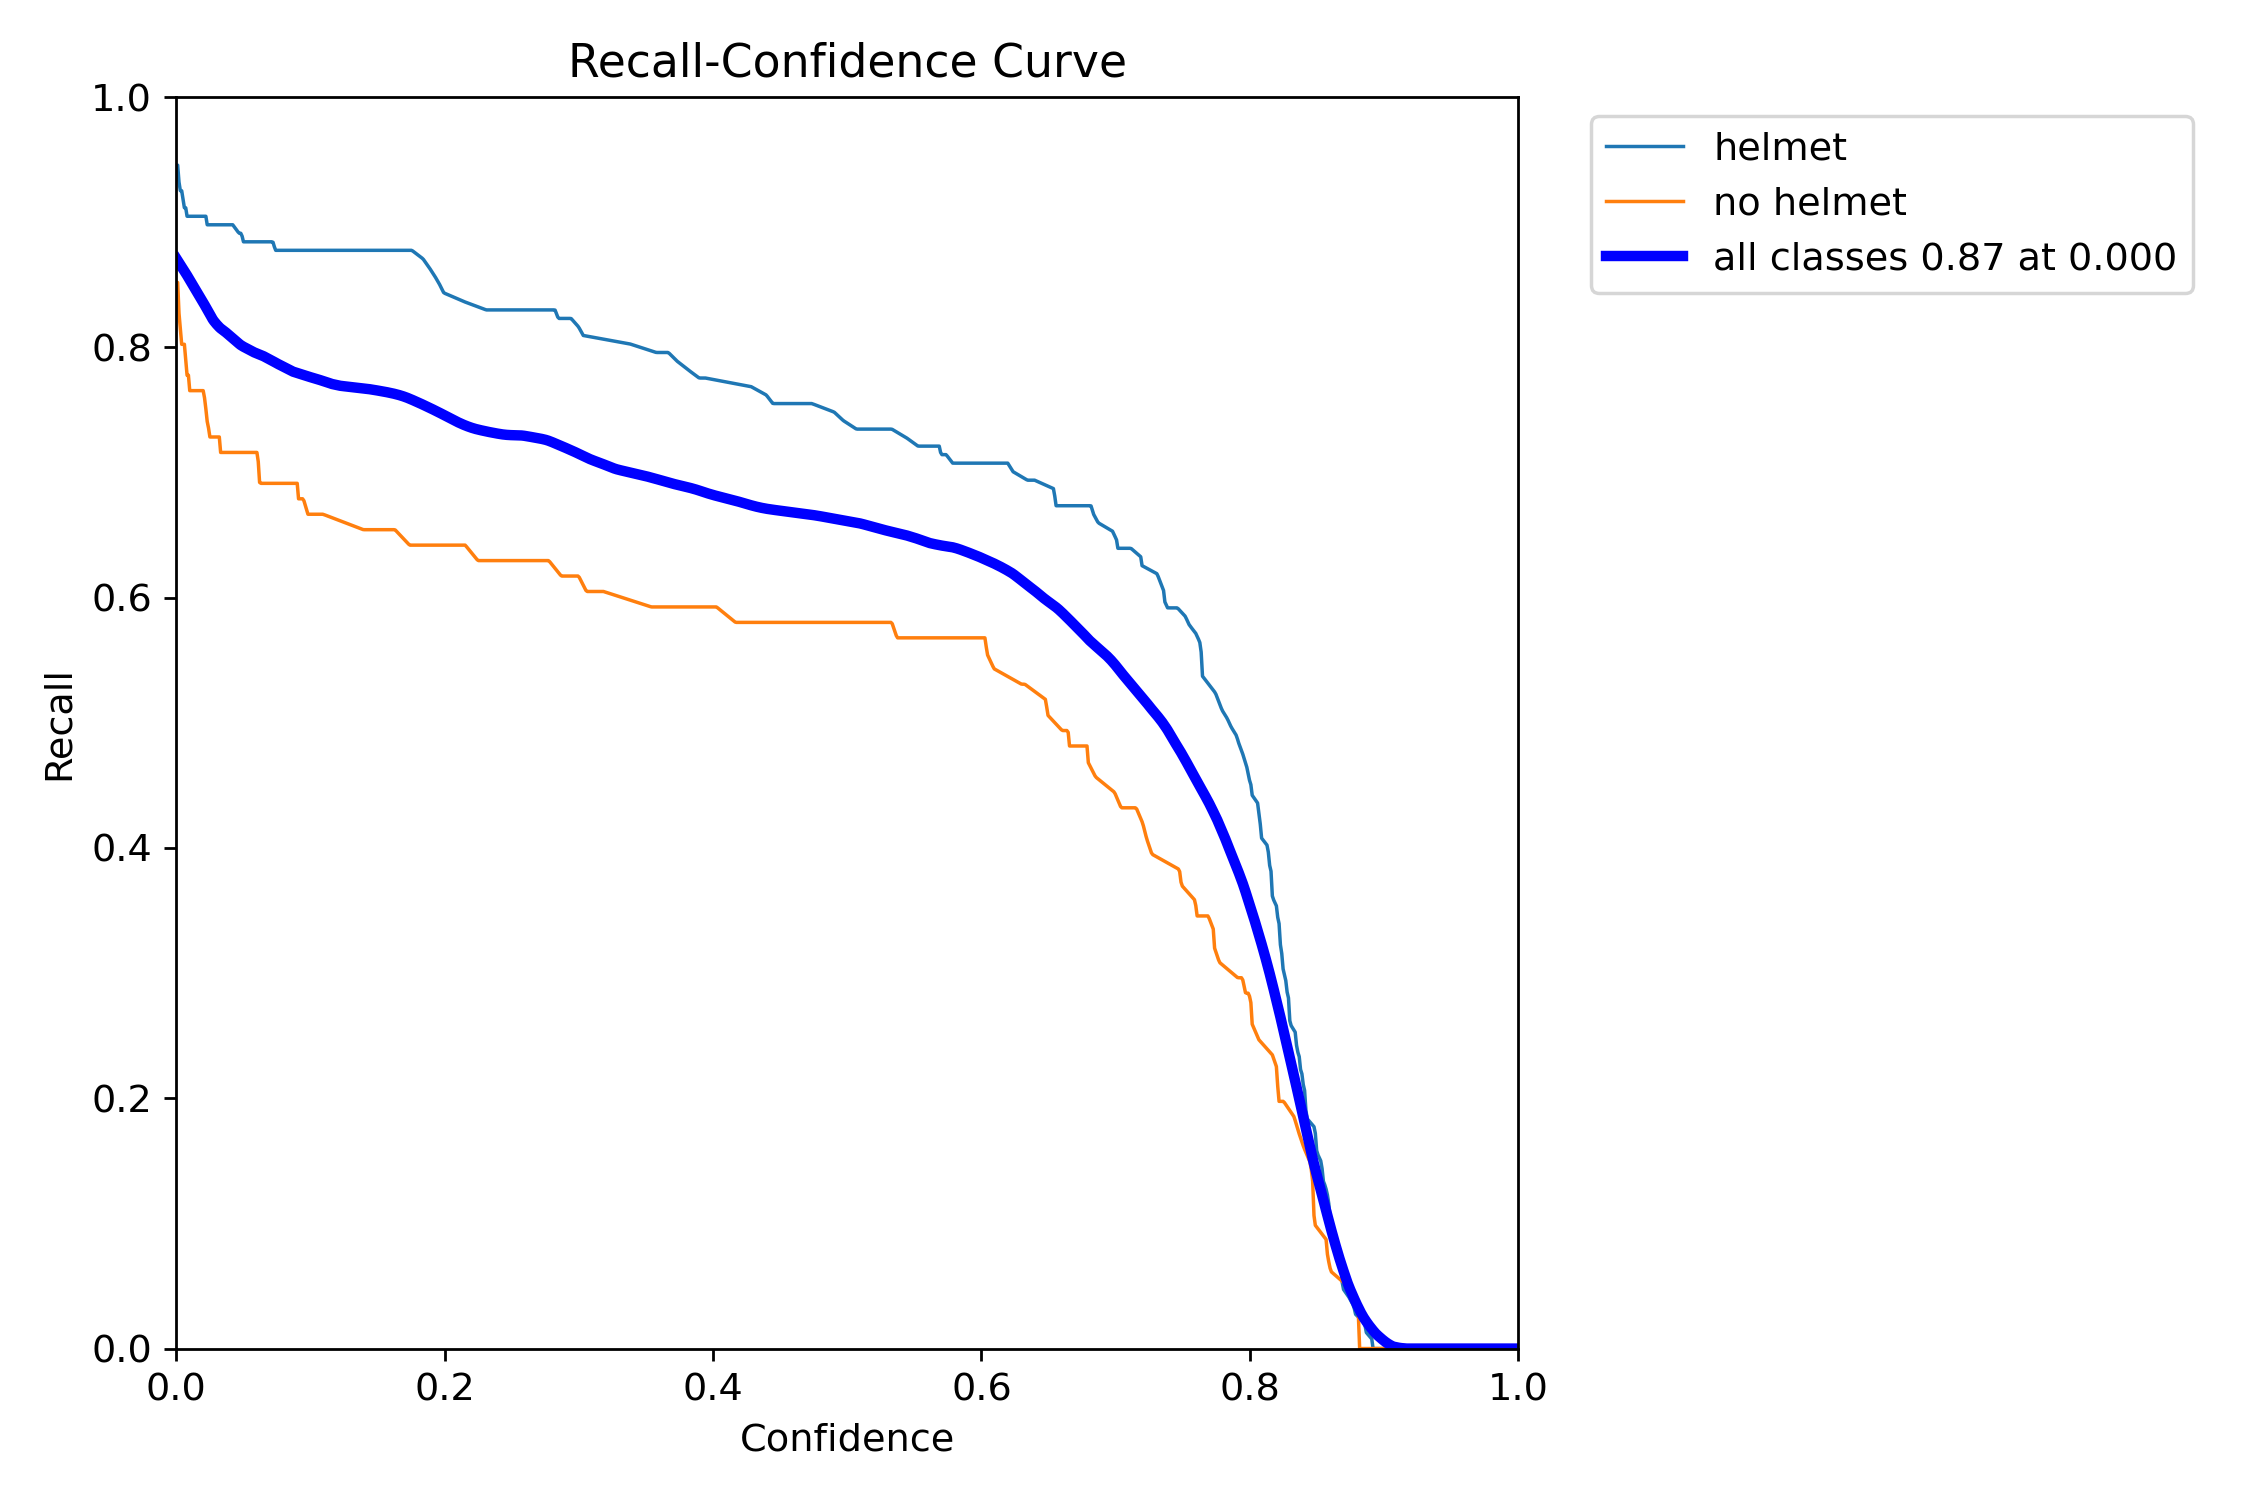

In [10]:
Image(filename=f'/home/balarcon/Palma/prueba2/runs/detect/train2/R_curve.png', width=800)

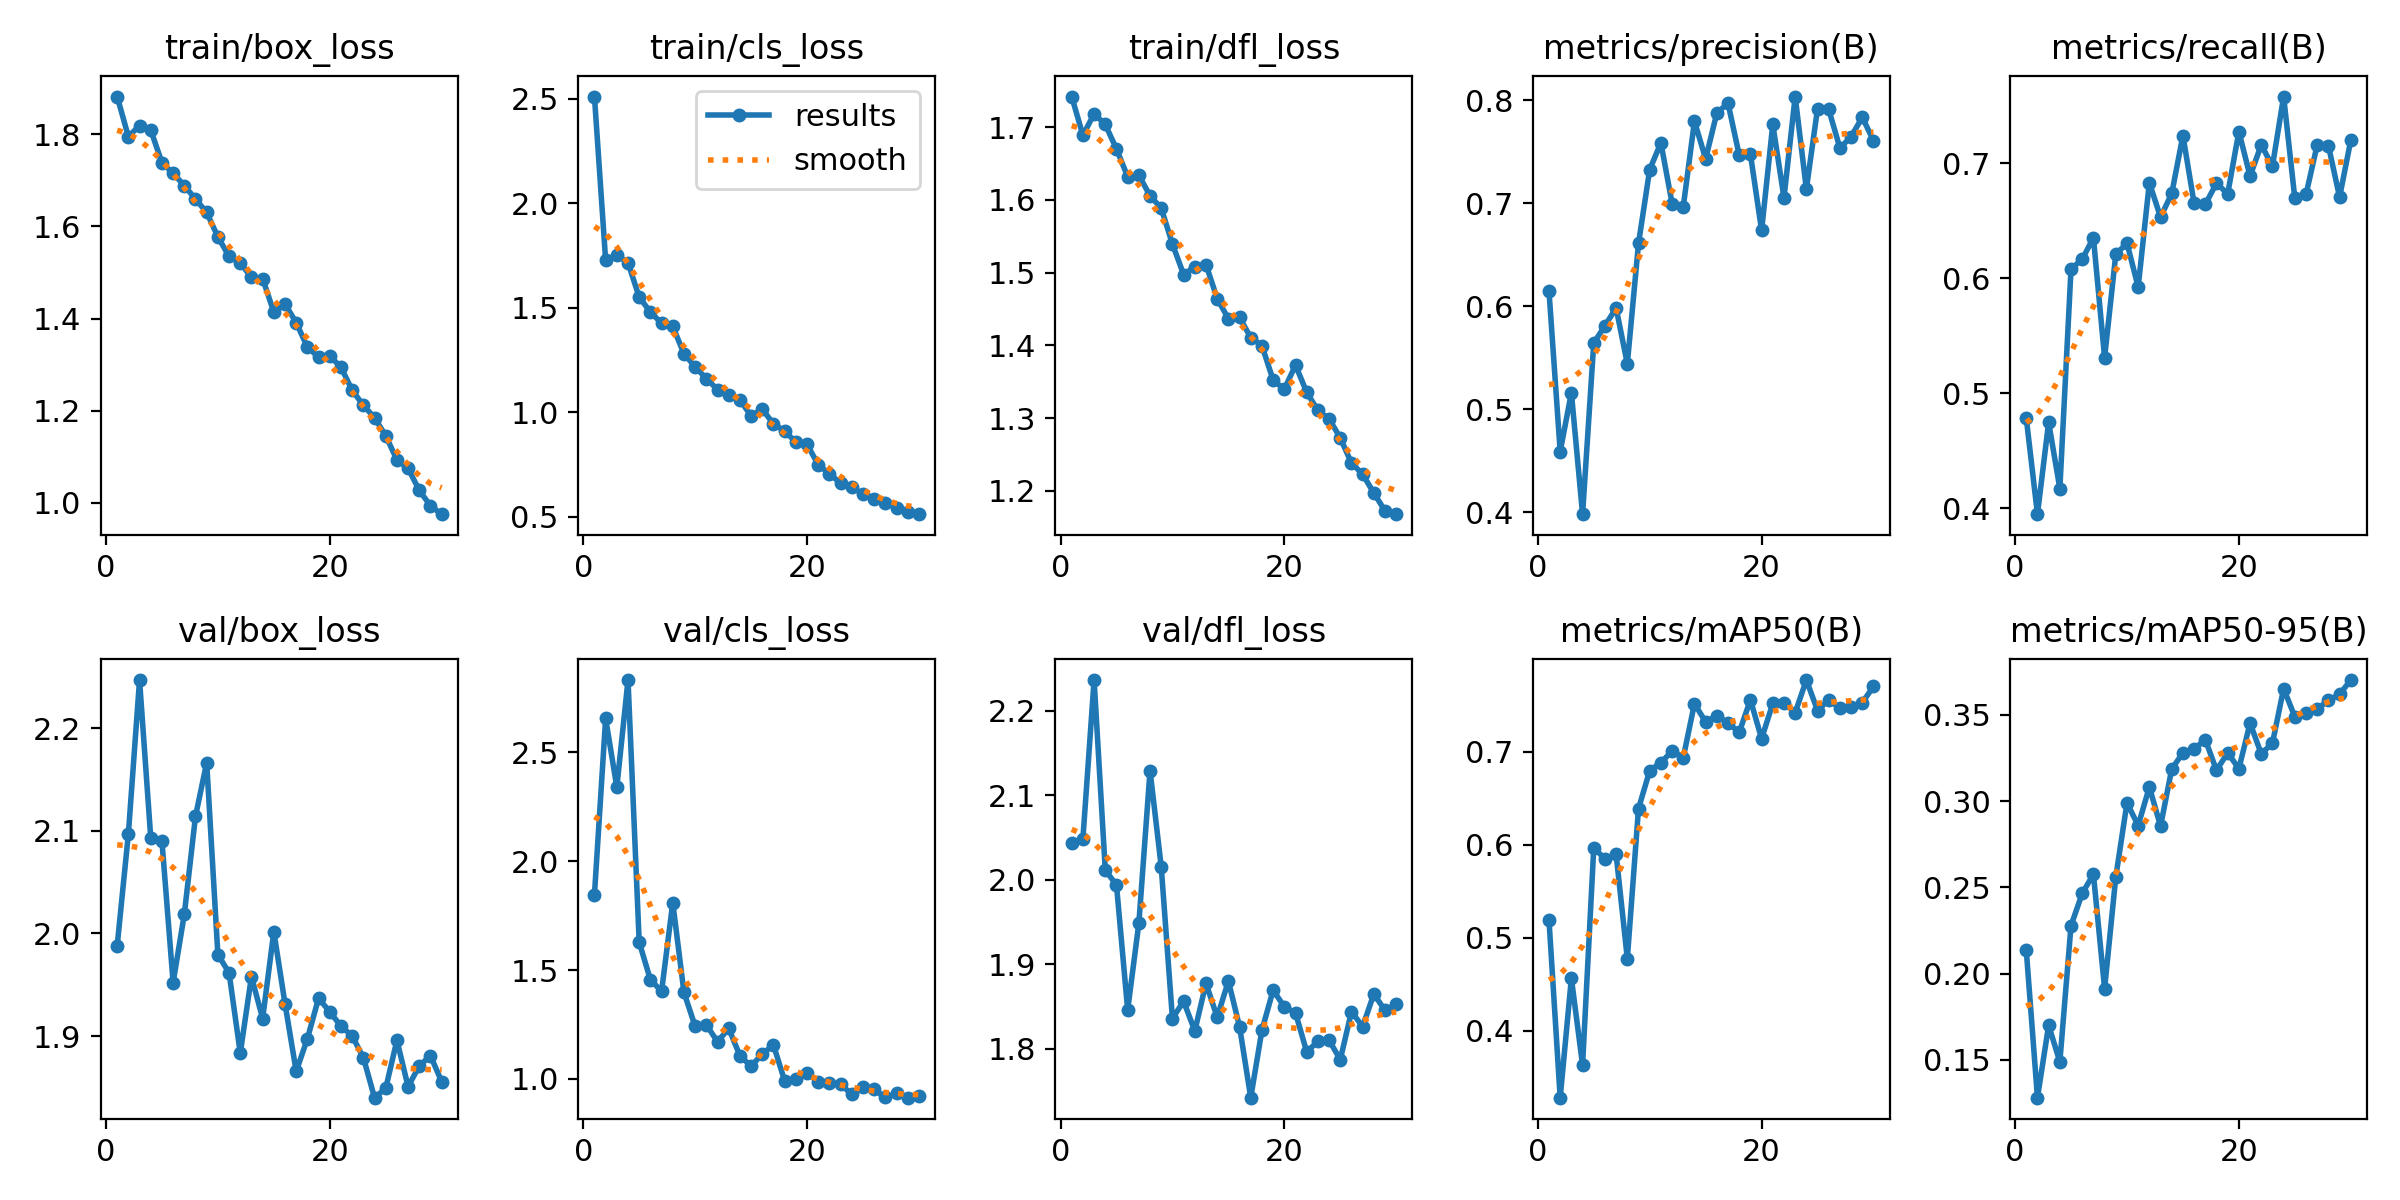

In [11]:
Image(filename=f'/home/balarcon/Palma/prueba2/runs/detect/train2/results.png', width=800)

TRAIN -> yolov8m

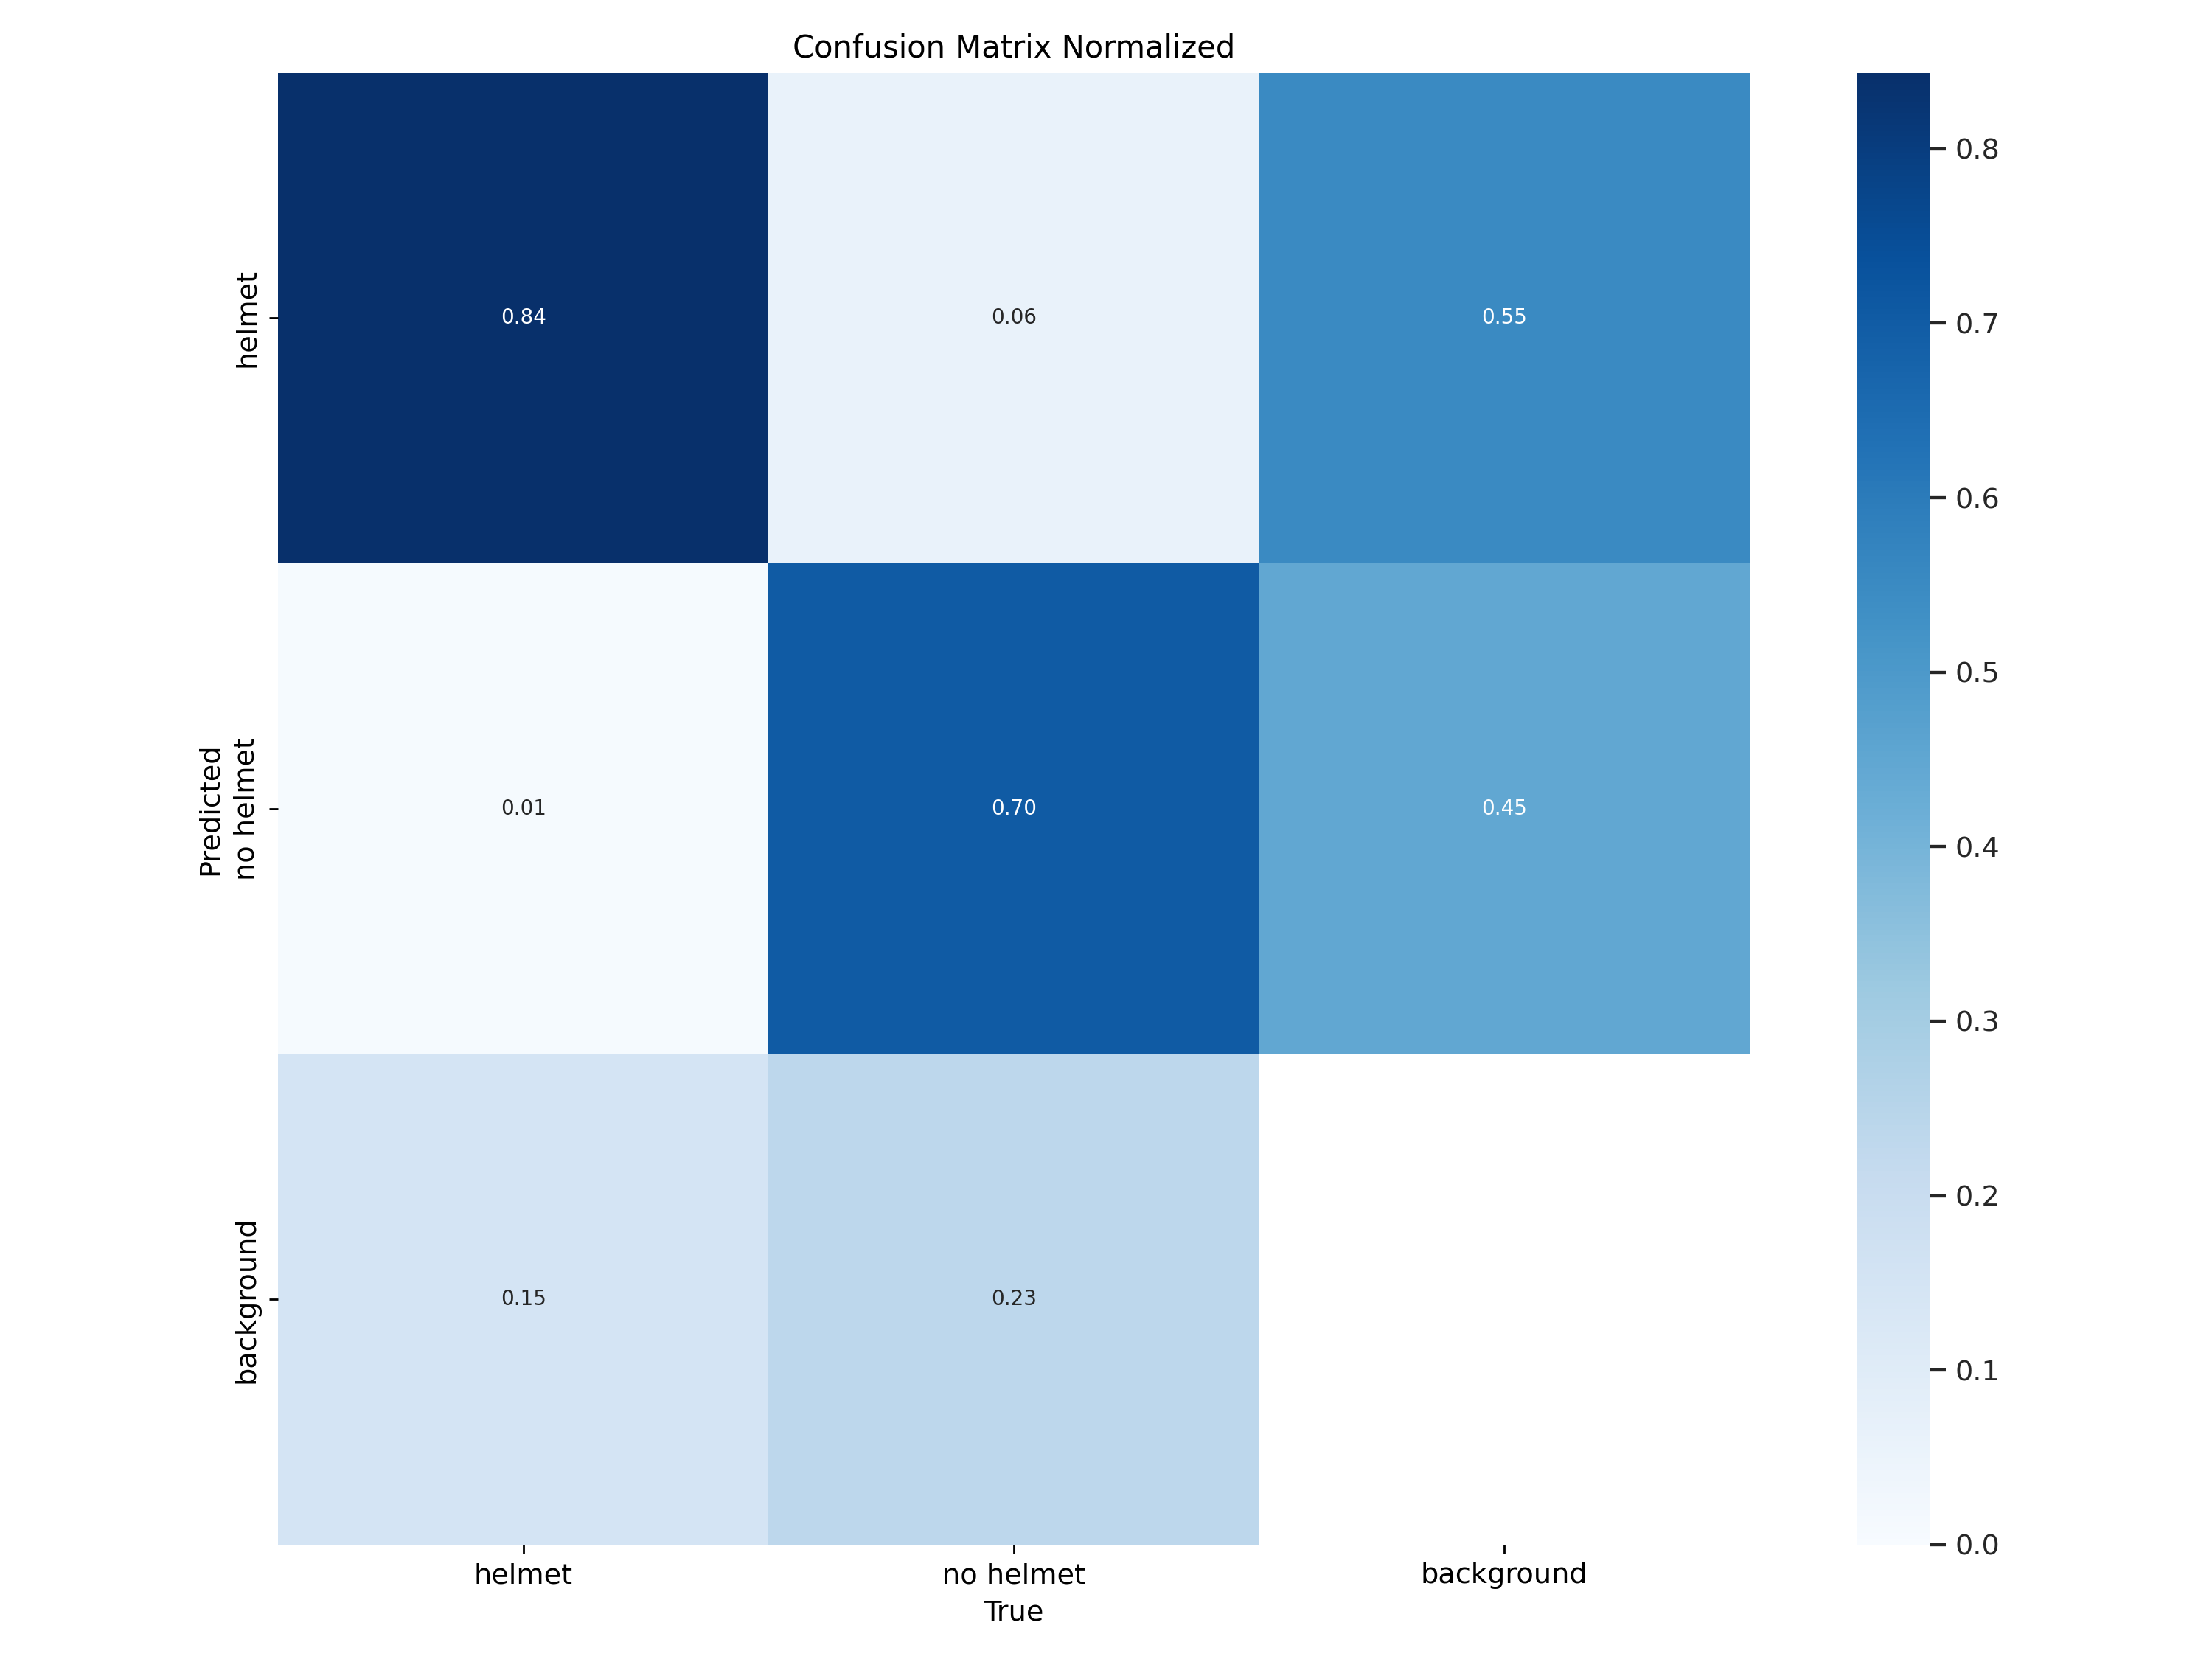

In [12]:
Image(filename=f'/home/balarcon/Palma/prueba2/runs/detect/train3/confusion_matrix_normalized.png', width=800)

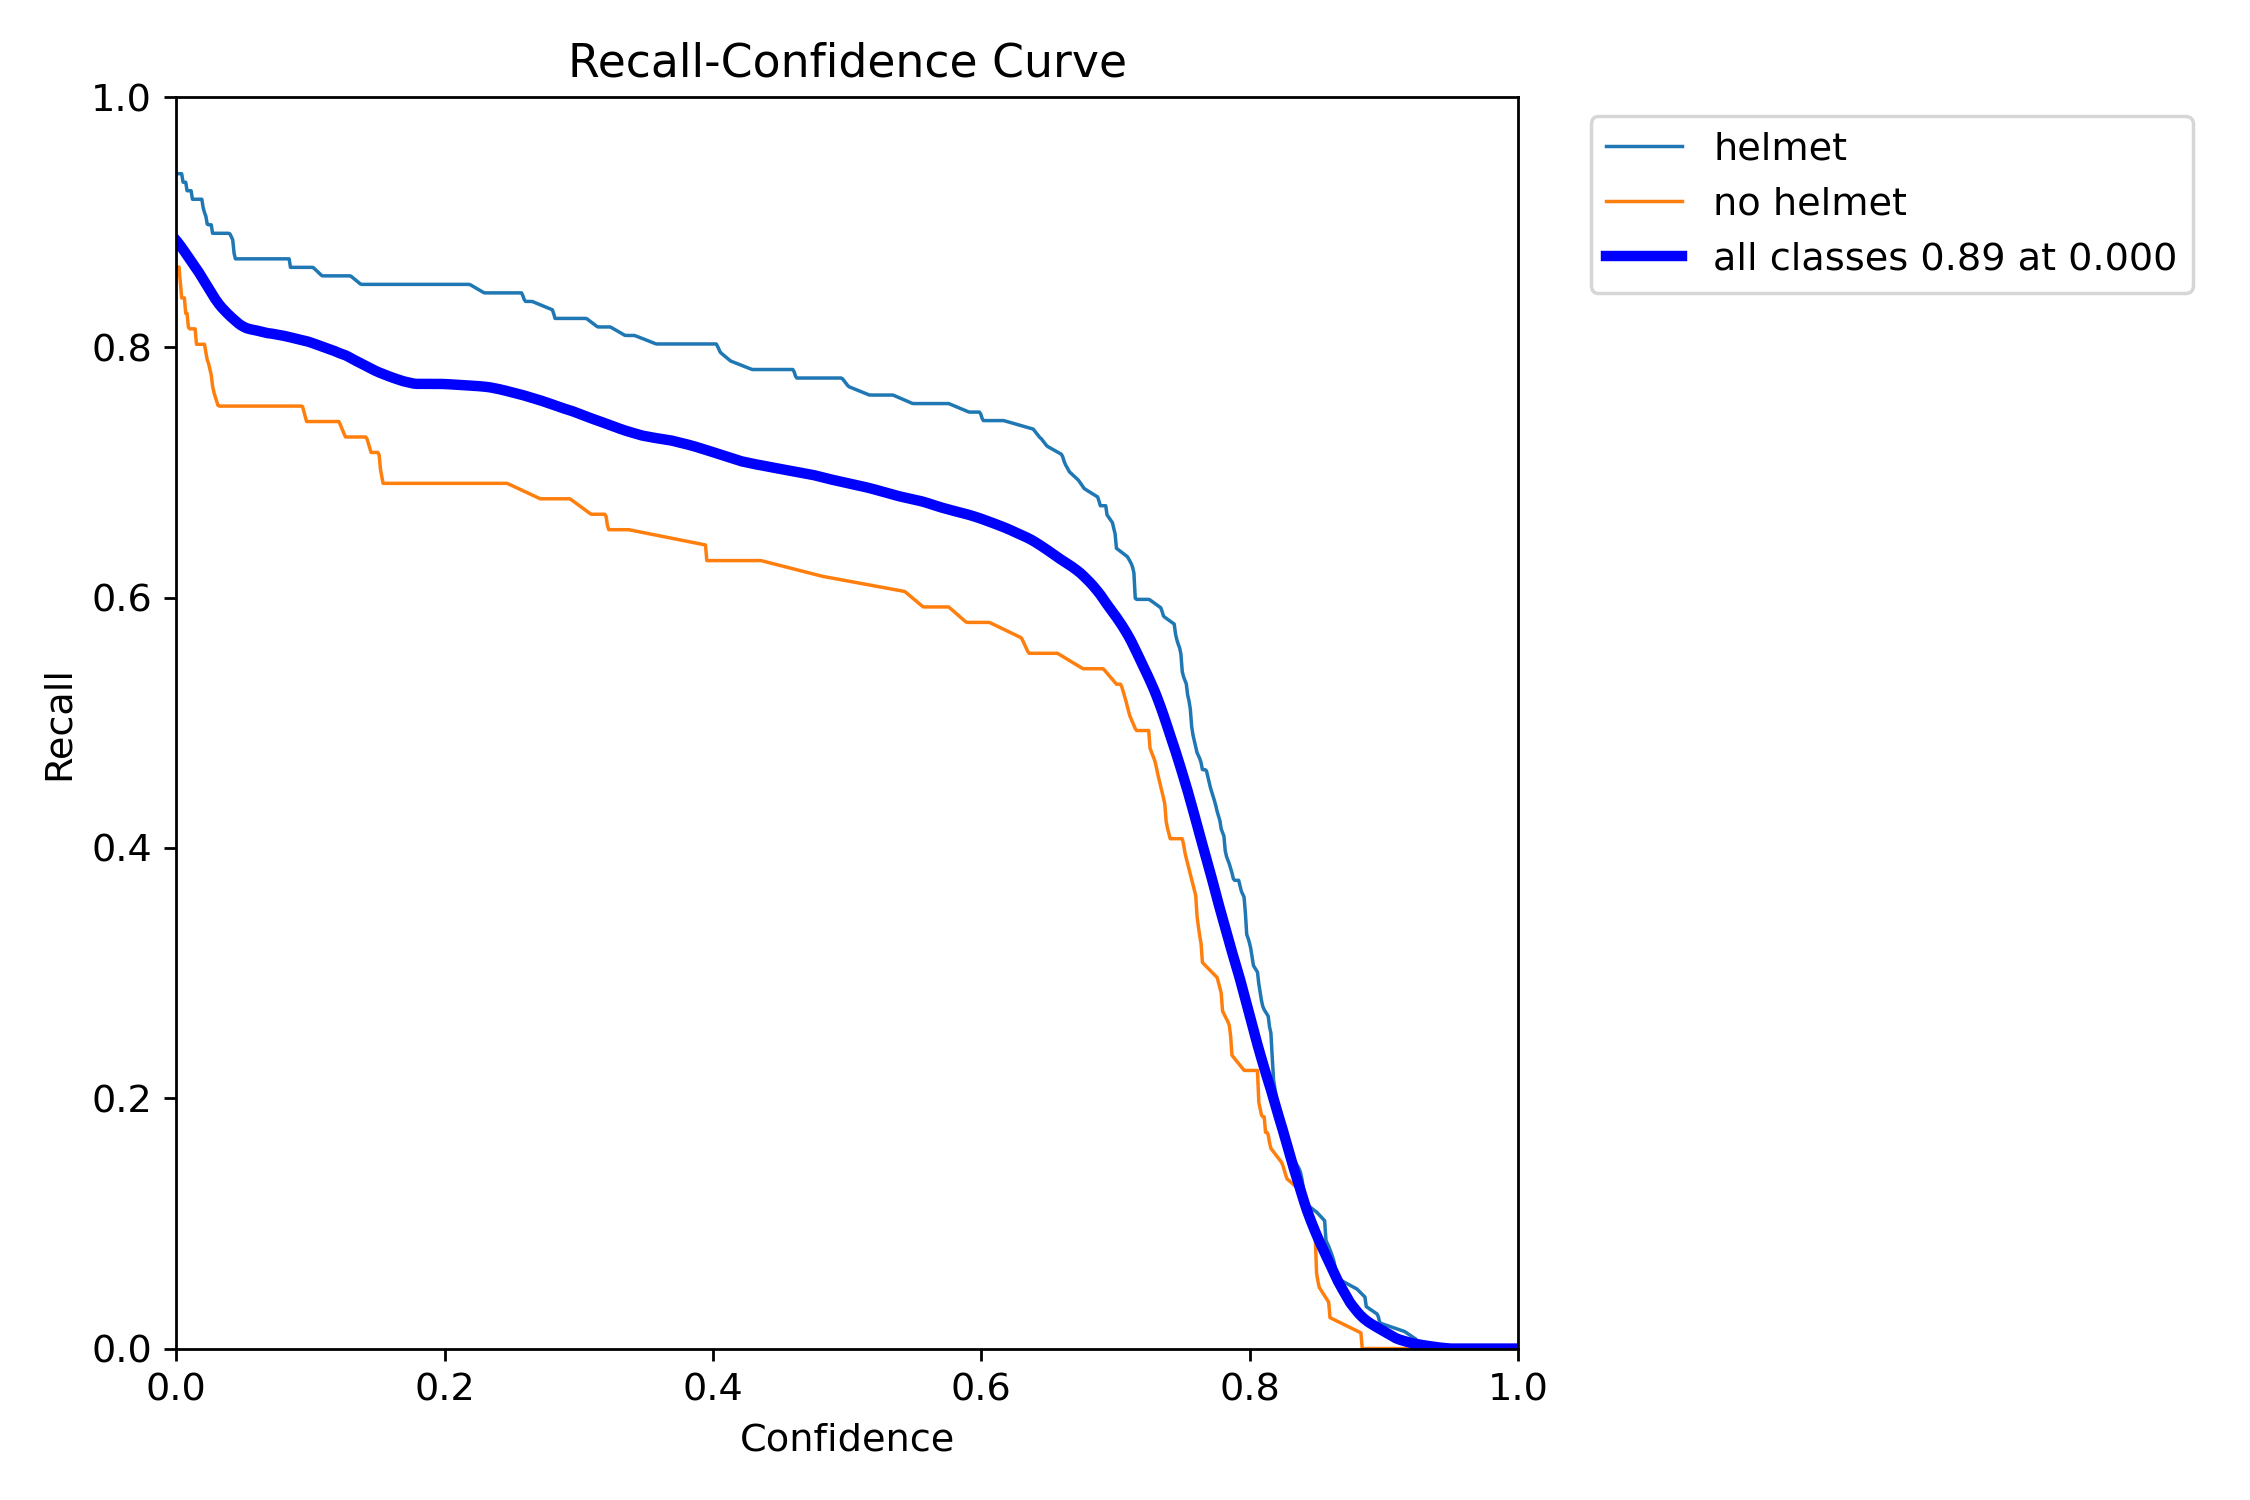

In [13]:
Image(filename=f'/home/balarcon/Palma/prueba2/runs/detect/train3/R_curve.png', width=800)

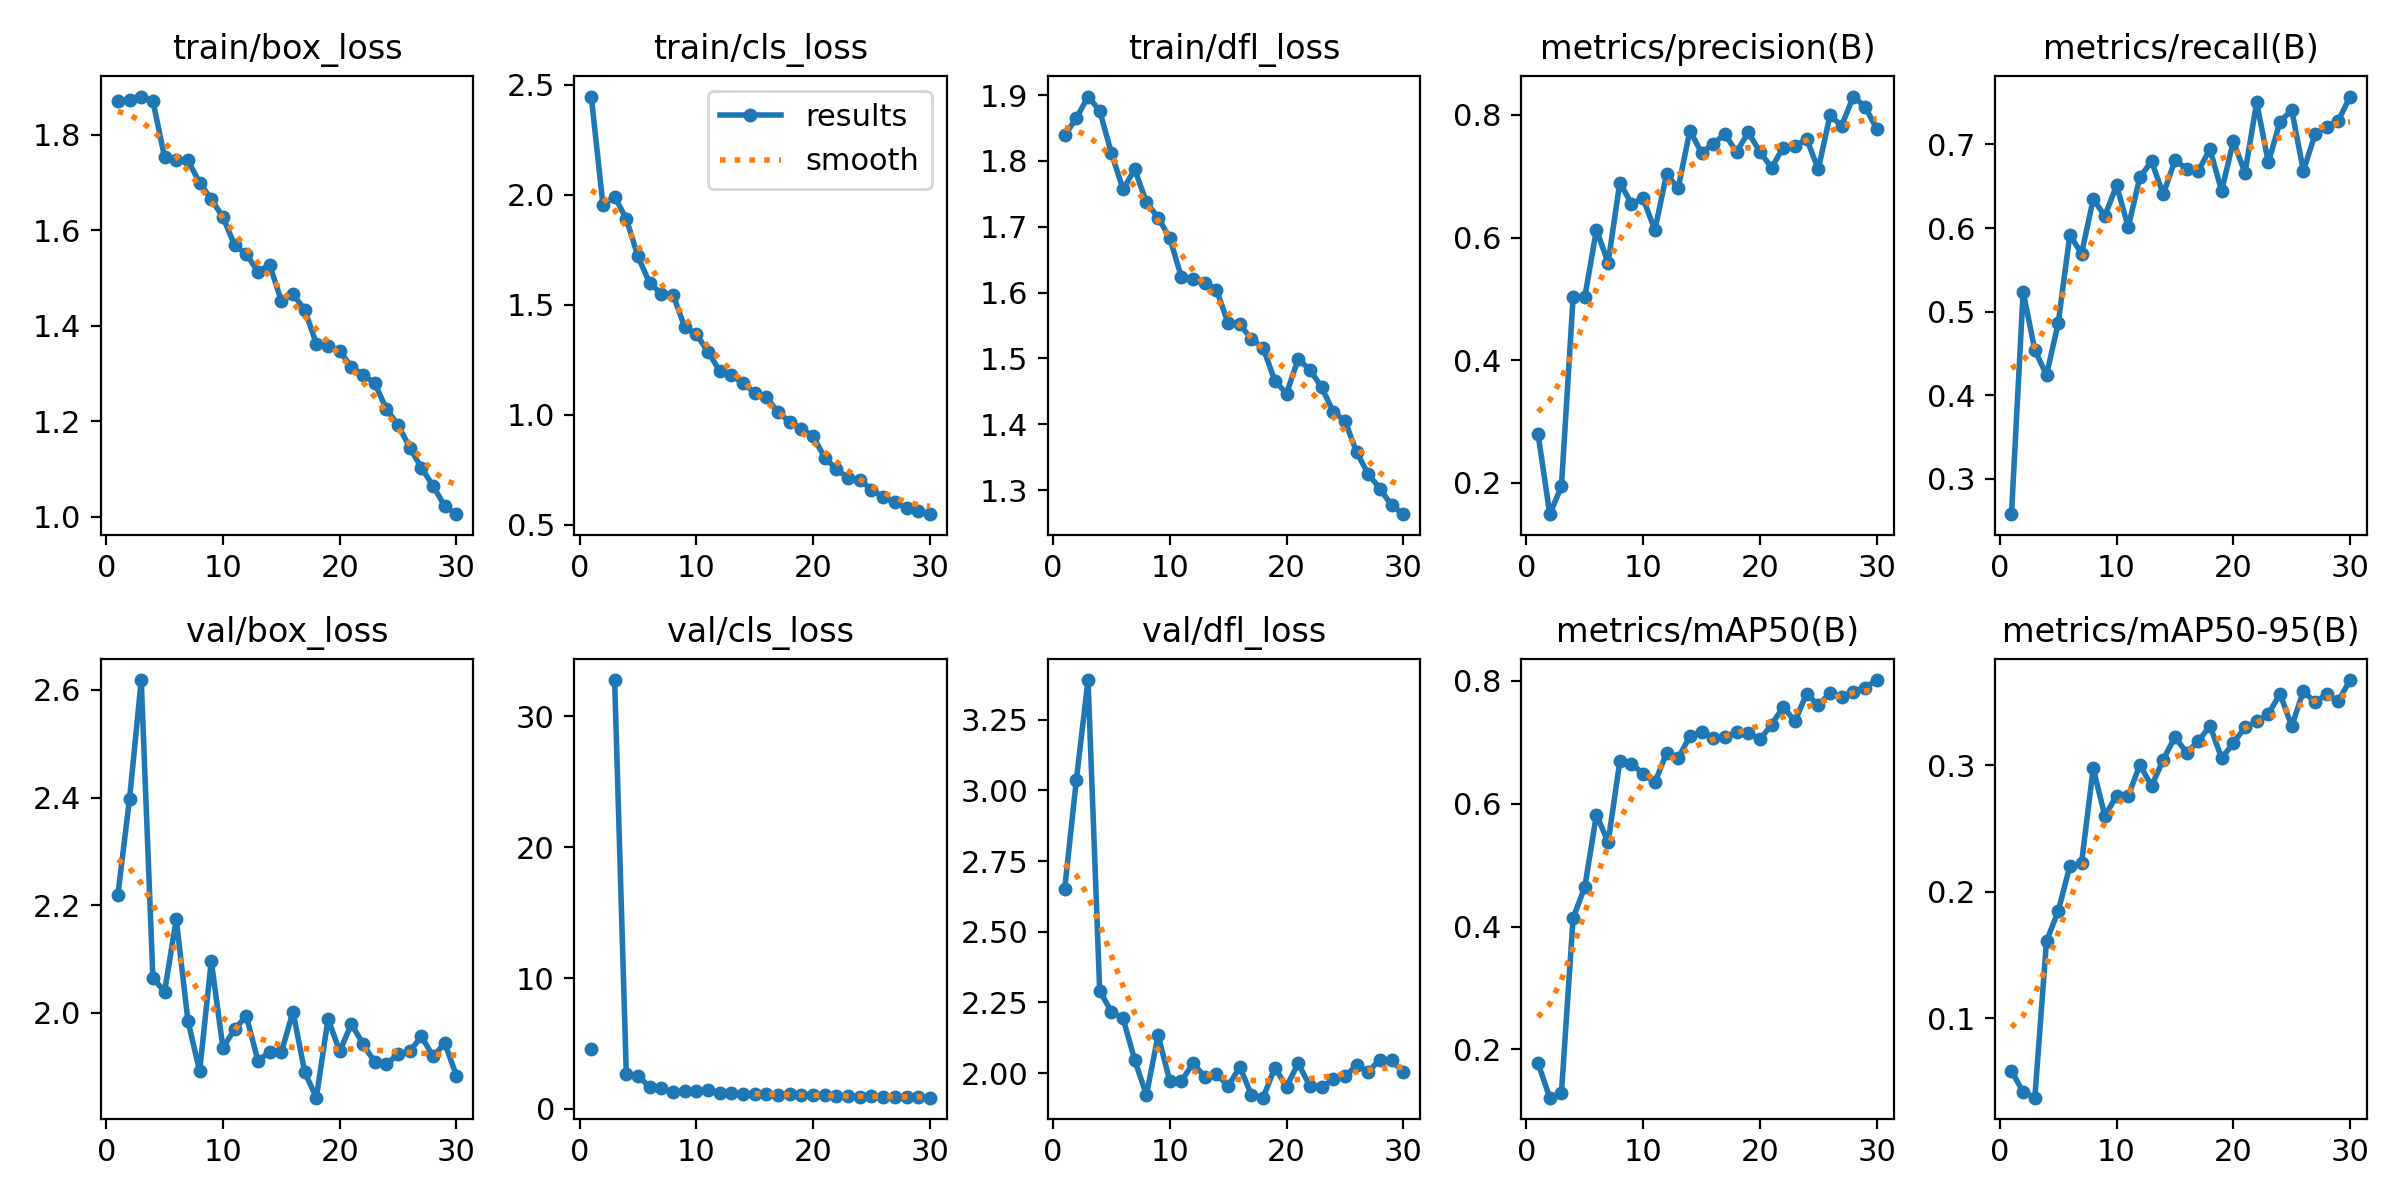

In [14]:
Image(filename=f'/home/balarcon/Palma/prueba2/runs/detect/train3/results.png', width=800)

validation -> yolov8s

In [15]:
!yolo task=detect mode=val model='/home/balarcon/Palma/prueba2/runs/detect/train2/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.53 🚀 Python-3.8.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7973MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        105        228      0.751       0.72      0.769      0.371
                helmet         90        147      0.884      0.823      0.895      0.447
             no helmet         29         81      0.618      0.617      0.644      0.295
Speed: 1.7ms preprocess, 6.1ms inference, 0.0ms loss, 15.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


validation -> yolov8m

In [16]:
!yolo task=detect mode=val model='/home/balarcon/Palma/prueba2/runs/detect/train3/weights/best.pt' data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.53 🚀 Python-3.8.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7973MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/valid/lab
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        105        228      0.777      0.758      0.802      0.366
                helmet         90        147      0.831      0.835      0.892      0.438
             no helmet         29         81      0.724       0.68      0.711      0.295
Speed: 1.8ms preprocess, 11.5ms inference, 0.1ms loss, 14.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


test -> yolov8s

In [18]:
!yolo task=detect mode=predict model='/home/balarcon/Palma/prueba2/runs/detect/train2/weights/best.pt' conf=0.4 source={dataset.location}/test/images

Ultralytics YOLOv8.2.53 🚀 Python-3.8.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7973MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-1-_jpeg.rf.b67ae0c429e8040ef16525f8ca2105e8.jpg: 640x640 1 helmet, 9.8ms
image 2/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-10-_jpeg.rf.ef2fda4ec68761fba89fc298b36f4f50.jpg: 640x640 1 helmet, 9.0ms
image 3/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-120-_jpg.rf.512e81b3d8511b733ffea789df23331b.jpg: 640x640 1 helmet, 6.9ms
image 4/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-145-_jpg.rf.954c729a41c03263ca12c3093df0e340.jpg: 640x640 1 helmet, 6.9ms
image 5/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-155-_jpg.rf.3cc8e0c21a207d3ada548e0ae2b848b7.jpg: 640x640 1 helmet, 7.3ms
image 6/53 /home/ba

test -> yolov8m

In [19]:
!yolo task=detect mode=predict model='/home/balarcon/Palma/prueba2/runs/detect/train3/weights/best.pt' conf=0.4 source={dataset.location}/test/images

Ultralytics YOLOv8.2.53 🚀 Python-3.8.10 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2080, 7973MiB)
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-1-_jpeg.rf.b67ae0c429e8040ef16525f8ca2105e8.jpg: 640x640 1 helmet, 14.3ms
image 2/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-10-_jpeg.rf.ef2fda4ec68761fba89fc298b36f4f50.jpg: 640x640 1 helmet, 14.3ms
image 3/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-120-_jpg.rf.512e81b3d8511b733ffea789df23331b.jpg: 640x640 1 helmet, 14.2ms
image 4/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-145-_jpg.rf.954c729a41c03263ca12c3093df0e340.jpg: 640x640 1 helmet, 14.3ms
image 5/53 /home/balarcon/Palma/prueba2/dataset/Motorcycle-helmet-1/test/images/Image-155-_jpg.rf.3cc8e0c21a207d3ada548e0ae2b848b7.jpg: 640x640 1 helmet, 14.2ms
image 6/53 /ho